In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Ensure plots display in notebook
%matplotlib inline


In [2]:
# Dataset directory structure:
# MMS Images/train/, MMS Images/val/, MMS Images/test/
base_dir = r"C:\Users\SIL-Laptop\Desktop\Final IAI Gustavo\steganography\MMS Captures from IEDScout\CNN\MMS Images"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Parameters
img_height, img_width = 64, 64
batch_size = 32
num_classes = 3
learning_rate = 0.001
epochs = 42
class_names = ['Normal', 'Attack', 'Faulty']


In [3]:
# Data preprocessing (rescale pixel values)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=class_names)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=class_names)


Found 1265 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 275 images belonging to 3 classes.


In [4]:
# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [5]:
# Train the CNN model
print("🚀 Training CNN model...")
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    verbose=1)


🚀 Training CNN model...
Epoch 1/42
40/40 [==============================] - 13s 302ms/step - loss: 0.9497 - accuracy: 0.4870 - val_loss: 0.8861 - val_accuracy: 0.4963
Epoch 2/42
40/40 [==============================] - 4s 93ms/step - loss: 0.8215 - accuracy: 0.6340 - val_loss: 0.7184 - val_accuracy: 0.6926
Epoch 3/42
40/40 [==============================] - 4s 93ms/step - loss: 0.7448 - accuracy: 0.6838 - val_loss: 0.6854 - val_accuracy: 0.6852
Epoch 4/42
40/40 [==============================] - 4s 95ms/step - loss: 0.7096 - accuracy: 0.6901 - val_loss: 0.6950 - val_accuracy: 0.6926
Epoch 5/42
40/40 [==============================] - 4s 94ms/step - loss: 0.6908 - accuracy: 0.6964 - val_loss: 0.6699 - val_accuracy: 0.7222
Epoch 6/42
40/40 [==============================] - 4s 96ms/step - loss: 0.6639 - accuracy: 0.7059 - val_loss: 0.6486 - val_accuracy: 0.6815
Epoch 7/42
40/40 [==============================] - 4s 94ms/step - loss: 0.6406 - accuracy: 0.7146 - val_loss: 0.5977 - val_accu

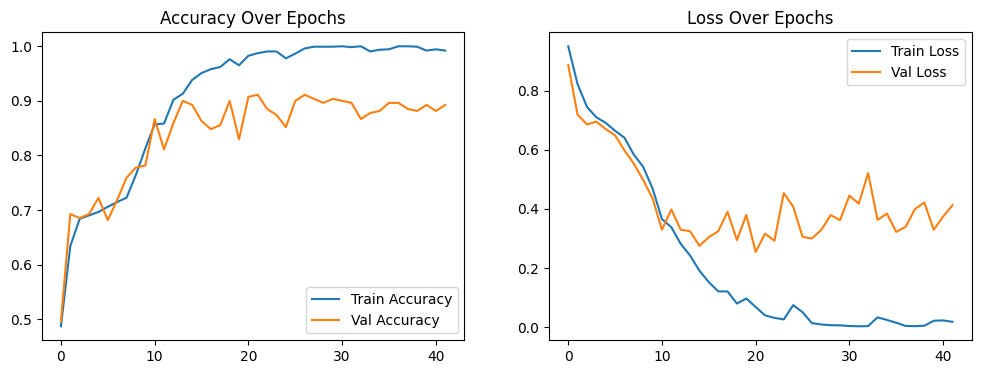

In [6]:
# Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [7]:
# Evaluate
print("\n🔍 Evaluating on test data...")
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")



🔍 Evaluating on test data...
9/9 [==============================] - 2s 202ms/step - loss: 0.5122 - accuracy: 0.8655
✅ Test Accuracy: 86.55%


🔮 Predicting class labels...
9/9 [==============================] - 0s 25ms/step


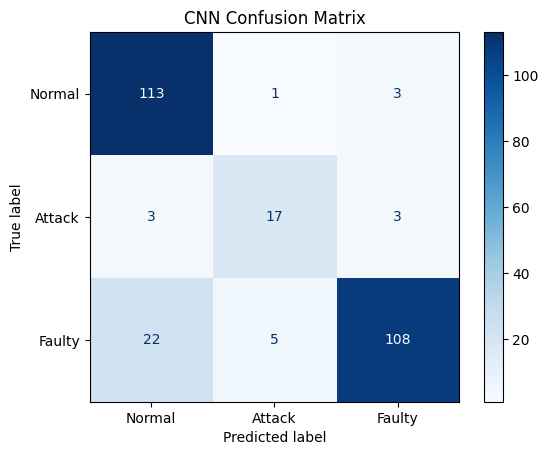

✅ Confusion matrix saved as cnn_confusion_matrix.png


<Figure size 640x480 with 0 Axes>

In [8]:
# Predict labels
print("🔮 Predicting class labels...")
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()

# Optionally save
plt.savefig("cnn_confusion_matrix.png")
print("✅ Confusion matrix saved as cnn_confusion_matrix.png")


In [9]:
print("\n📝 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



📝 Classification Report:
              precision    recall  f1-score   support

      Normal       0.82      0.97      0.89       117
      Attack       0.74      0.74      0.74        23
      Faulty       0.95      0.80      0.87       135

    accuracy                           0.87       275
   macro avg       0.84      0.83      0.83       275
weighted avg       0.88      0.87      0.86       275



In [10]:
# Save model
model.save("cnn_3_class_model.h5")
print("💾 Model saved as cnn_3_class_model.h5")


💾 Model saved as cnn_3_class_model.h5
